In [293]:
# Entrenar el modelo
import matplotlib.pyplot as plt
w, b, loss_history_train, acc_history_train, loss_history_test, acc_history_test = train_model(X_train, y_train, X_test, y_test, alpha=0.01, max_epochs=300)

# Evaluar
mse_train, acc_train = evaluate_model(X_train, y_train, w, b)
mse_test, acc_test = evaluate_model(X_test, y_test, w, b)

print(f"Train MSE: {mse_train:.4f} | Accuracy: {acc_train:.4f}")
print(f"Test  MSE: {mse_test:.4f} | Accuracy: {acc_test:.4f}")

# Graficar pérdida
plot_loss(loss_history_train)

#### Mateo Tejera - **`Segundo Trabajo Práctico`** - `Métodos Computacionales`

##### Imports

In [303]:
import numpy as np
from tqdm.auto import tqdm

In [304]:
SEED = 42
healthy_path = "data/raw/Healthy"
parkinson_path = "data/raw/Parkinson"

In [306]:
# Carga y División de Datos
from src.load_data import split_dataset 

X_train, y_train, X_test, y_test = split_dataset( 
    healthy_dir=healthy_path,
    parkinson_dir=parkinson_path,
    test_ratio=0.2,
    size=(64, 64),
    seed=SEED
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1304, 4096)
y_train shape: (1304,)
X_test shape: (328, 4096)
y_test shape: (328,)


In [ ]:
#EJERCICIO 1 DERIVADAS

# Función de activación
def f_wb(x, w, b):
    return (np.tanh(np.dot(x, w) + b) + 1) / 2

# Derivadas parciales de la función de pérdida L respecto a w y b
def derivadas_parciales(X, y, w, b):
    t = np.tanh(np.dot(X, w) + b)            # activación
    f = f_wb(X, w, b)                        # activación con tanh normalizada

    error = f - y                           # diferencia entre predicción y verdadero

    # derivadas con regla de la cadena (tanh') = 1 - tanh²
    # y sabiendo que la loss es L(w, b) = MSE = 1/N ∑(fi - yi)², entonces:
    # 2/N (fi - yi) * dfi/dw o dfi/db
    df_dw = 2 * np.dot((error * 0.5*((1 - t**2))), X) / len(X)
    df_db = 2 * np.sum((error * 0.5*((1 - t**2)))) / len(X)

    return df_dw, df_db

In [ ]:
#EJERCICIO 2 DESCENSO POR GRADIENTE
def train_model(X_train, y_train, X_test=None,  y_test=None, seed = SEED, alpha=0.001, max_epochs=10000):
    np.random.seed(seed)
    w = np.random.randn(X_train.shape[1]) * 0.01  # inicialización pequeña
    b = 0.0

    loss_history_train = []
    acc_history_train  = []
    loss_history_test  = []
    acc_history_test   = []

    for epoch in tqdm(range(1, max_epochs+1), desc="Training", dynamic_ncols=True):
        # f =  f_wb(X, w, b)  
        # error = f - y

        # # Derivadas parciales (como en Ej.1)
        # grad_w, grad_b = derivadas_parciales(X, y, w, b)

        # # Actualización
        # w -= alpha * grad_w
        # b -= alpha * grad_b

        # # Guardar pérdida cuadrática
        # loss = np.mean((f - y)**2)
        # loss_history.append(loss)
        
        # if (epoch + 1) % 1000 == 0:
        #     tqdm.write(f"[epoch {epoch+1}] loss = {loss:.6f}")
            
        
        # ==== train step ====
        f_train = f_wb(X_train, w, b)
        loss_t  = np.mean((f_train - y_train)**2)
        acc_t   = np.mean((f_train > 0.5) == (y_train > 0.5))
        loss_history_train.append(loss_t)
        acc_history_train.append(acc_t)

        # gradiente y actualización
        grad_w, grad_b = derivadas_parciales(X_train, y_train, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b

        # ==== test evaluation (si se pasan datos de test) ====
        if X_test is not None and y_test is not None:
            f_test = f_wb(X_test, w, b)
            loss_te  = np.mean((f_test - y_test)**2)
            acc_te   = np.mean((f_test > 0.5) == (y_test > 0.5))
            loss_history_test.append(loss_te)
            acc_history_test.append(acc_te)

        # logging opcional cada 100 épocas o la primera
        if epoch == 1 or epoch % 100 == 0:
            msg = f"Epoch {epoch:4d} | Train loss={loss_t:.4f}, acc={acc_t:.4f}"
            if loss_history_test:
                msg += f" | Test loss={loss_te:.4f}, acc={acc_te:.4f}"
            tqdm.write(msg)
        

    return w, b, loss_history_train, acc_history_train, loss_history_test, acc_history_test
  


In [ ]:
#EJERCICIO 3
def evaluate_model(X, y, w, b):
    f =  f_wb(X, w, b)
    mse = np.mean((f - y)**2)
    accuracy = np.mean((f > 0.5) == (y > 0.5))
    return mse, accuracy

In [307]:
from src.plot import plot_loss

In [ ]:
from src.plot import plot_loss_train_test
 
# Entrenamiento
w, b, loss_history_train, acc_history_train, loss_history_test, acc_history_test = train_model(X_train, y_train, X_test, y_test, alpha=0.0001, max_epochs=1000)

# Estimar curva de test (con w y b finales)
# loss_history_test = []
# for _ in range(len(loss_history_train)):
#     pred_test = np.tanh(np.dot(X_test, w) + b)
#     loss_test = np.mean((pred_test - y_test)**2)
#     loss_history_test.append(loss_test)

# Graficar ambas curvas
plot_loss_train_test(loss_history_train, loss_history_test)


In [297]:
#EJERCICIO 4 NORMALIZACIÓN
def normalizar_dataset(X):
    return X / 255.0

In [298]:
# Normalizar los datos de train y test
X_train_n = normalizar_dataset(X_train)
X_test_n = normalizar_dataset(X_test)

# Entrenar modelo con datos normalizados
w_n, b_n, loss_history_train_n, acc_history_train_n, loss_history_test_n, acc_history_test_n = train_model(X_train_n, y_train, X_test_n, y_test, alpha=0.0001, max_epochs=1000)

# Evaluar
mse_train_n, acc_train_n = evaluate_model(X_train_n, y_train, w_n, b_n)
mse_test_n, acc_test_n = evaluate_model(X_test_n, y_test, w_n, b_n)

print(f"[Normalizado] Train MSE: {mse_train_n:.4f} | Accuracy: {acc_train_n:.4f}")
print(f"[Normalizado] Test  MSE: {mse_test_n:.4f} | Accuracy: {acc_test_n:.4f}")

# Graficar pérdida
plot_loss(loss_history_train_n)

In [299]:
# Estimar curva de test con datos normalizados (usando w_n y b_n)
loss_history_test_n = []
for _ in range(len(loss_history_train_n)):
    pred_test_n = np.tanh(np.dot(X_test_n, w_n) + b_n)
    loss_test_n = np.mean((pred_test_n - y_test)**2)
    loss_history_test_n.append(loss_test_n)

# Graficar
plot_loss_train_test(loss_history_train_n, loss_history_test_n)


In [ ]:
#EJERCICIO 5
# Lista de alphas a probar
alphas = [0.0001, 0.001, 0.01, 0.05, 0.1]

results_alpha_sweep = {}
for alpha in tqdm(alphas, desc="Alphas"):

    w, b, loss_history_train, acc_history_train, loss_history_test, acc_history_test = train_model(X_train_n, y_train, X_test_n, y_test, alpha=alpha, max_epochs=10000)
    mse_test, acc_test = evaluate_model(X_test_n, y_test, w, b)
    mse_train, acc_train = evaluate_model(X_train, y_train, w, b)

    
    results_alpha_sweep[alpha] = {
        'mse_test': mse_test,
        'mse_train': mse_train,
        'acc_train_final': acc_train,
        'acc_test_final': acc_test,
        'acc_train': acc_history_train,
        'acc_test': acc_history_test,
        'loss_train': loss_history_train,
        'loss_test': loss_history_test,
    }
    
    print(f"α = {alpha:.4f} → "
        f"Test MSE = {mse_test:.4f} | Acc Test = {acc_test:.4f} | "
        f"Train MSE = {mse_train:.4f} | Acc Train = {acc_train:.4f}")

In [ ]:
from src.plot import plot_train_test_metrics

plot_train_test_metrics(results_alpha_sweep)

In [301]:
best_alpha = 0.001

In [ ]:


#Entrenamiento final con el mejor alpha
best_alpha = 0.001

results_finales = {}

w, b, loss_history_train, acc_history_train, loss_history_test, acc_history_test = train_model(X_train_n, y_train, X_test_n, y_test, alpha=best_alpha, max_epochs=110000)
mse_test, acc_test = evaluate_model(X_test_n, y_test, w, b)
mse_train, acc_train = evaluate_model(X_train, y_train, w, b)


# results_finales = {
#     'mse_test': mse_test,
#     'mse_train': mse_train,
#     'acc_train_final': acc_train,
#     'acc_test_final': acc_test,
#     'acc_train': acc_history_train,
#     'acc_test': acc_history_test,
#     'loss_train': loss_history_train,
#     'loss_test': loss_history_test,
# }

print(f"Test MSE = {mse_test:.4f} | Acc Test = {acc_test:.4f} | "
      f"Train MSE = {mse_train:.4f} | Acc Train = {acc_train:.4f}")

In [272]:
results_finales = {}

results_finales[alpha] = {
    'mse_test': mse_test,
    'mse_train': mse_train,
    'acc_train_final': acc_train,
    'acc_test_final': acc_test,
    'acc_train': acc_history_train,
    'acc_test': acc_history_test,
    'loss_train': loss_history_train,
    'loss_test': loss_history_test,
}

In [ ]:
from src.plot import plot_train_test_metrics 

In [273]:
plot_train_test_metrics(results_finales, plot_train = True)

In [ ]:
from tqdm.auto import tqdm

#Entrenamiento final con el mejor alpha
best_alpha = 0.001

results_finales_200000 = {}

w_final, b_final, loss_history_train, acc_history_train, loss_history_test, acc_history_test = train_model(X_train_n, y_train, X_test_n, y_test, alpha=best_alpha, max_epochs=200000)
mse_test, acc_test = evaluate_model(X_test_n, y_test, w_final, b_final)
mse_train, acc_train = evaluate_model(X_train, y_train, w_final, b_final)


results_finales_200000[best_alpha] = {
    'mse_test': mse_test,
    'mse_train': mse_train,
    'acc_train_final': acc_train,
    'acc_test_final': acc_test,
    'acc_train': acc_history_train,
    'acc_test': acc_history_test,
    'loss_train': loss_history_train,
    'loss_test': loss_history_test,
}

print(f"Test MSE = {mse_test:.4f} | Acc Test = {acc_test:.4f} | "
      f"Train MSE = {mse_train:.4f} | Acc Train = {acc_train:.4f}")

In [ ]:
plot_train_test_metrics(results_finales_200000, plot_train = True)

distintas escalas

In [300]:
X_train_32, y_train_32, X_test_32, y_test_32 = split_dataset(
    healthy_dir=healthy_path,
    parkinson_dir=parkinson_path,
    test_ratio=0.2,
    size=(32, 32)
)

X_train_32_n = normalizar_dataset(X_train_32)
X_test_32_n = normalizar_dataset(X_test_32)

X_train_128, y_train_128, X_test_128, y_test_128 = split_dataset(
    healthy_dir=healthy_path,
    parkinson_dir=parkinson_path,
    test_ratio=0.2,
    size=(128, 128)
)

X_train_128_n = normalizar_dataset(X_train_128)
X_test_128_n = normalizar_dataset(X_test_128)

In [302]:
from tqdm.auto import tqdm

#EJERCICIO 5

definitions = {
    32: {
        "Train": (X_train_32_n, y_train_32),
        "Test":  (X_test_32_n,  y_test_32)
    },
    64: {
        "Train": (X_train_n, y_train),
        "Test":  (X_test_n,  y_test)
    },
    128: {
        "Train": (X_train_128_n, y_train_128),
        "Test":  (X_test_128_n,  y_test_128)
    }
}


results_sizes_sweep = {}

for size, datasets in tqdm(
    definitions.items(),
    desc="Tamaños",
    dynamic_ncols=True,
    bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{remaining} restantes]'
):
    X_train, y_train = datasets["Train"]
    X_test,  y_test  = datasets["Test"]

    w, b, loss_history_train, acc_history_train, loss_history_test, acc_history_test = train_model(
        X_train, y_train, X_test, y_test, alpha=best_alpha, max_epochs=10000
    )

    mse_test, acc_test = evaluate_model(X_test, y_test, w, b)
    mse_train, acc_train = evaluate_model(X_train, y_train, w, b)

    results_sizes_sweep[size] = {
        'mse_test': mse_test,
        'mse_train': mse_train,
        'acc_train_final': acc_train,
        'acc_test_final': acc_test,
        'acc_train': acc_history_train,
        'acc_test': acc_history_test,
        'loss_train': loss_history_train,
        'loss_test': loss_history_test,
    }

    print(f"Size = {size:>3} → "
          f"Test MSE = {mse_test:.4f} | Acc Test = {acc_test:.4f} | "
          f"Train MSE = {mse_train:.4f} | Acc Train = {acc_train:.4f}")


Tamaños:   0%|          | 0/3 [? restantes]

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Epoch    1 | Train loss=0.2649, acc=0.5000 | Test loss=0.2583, acc=0.5000
Epoch  100 | Train loss=0.2499, acc=0.5061 | Test loss=0.2504, acc=0.4726
Epoch  200 | Train loss=0.2497, acc=0.5169 | Test loss=0.2504, acc=0.4726
Epoch  300 | Train loss=0.2496, acc=0.5184 | Test loss=0.2503, acc=0.4848
Epoch  400 | Train loss=0.2494, acc=0.5322 | Test loss=0.2502, acc=0.4848
Epoch  500 | Train loss=0.2493, acc=0.5452 | Test loss=0.2501, acc=0.4726
Epoch  600 | Train loss=0.2492, acc=0.5529 | Test loss=0.2501, acc=0.4756
Epoch  700 | Train loss=0.2490, acc=0.5552 | Test loss=0.2500, acc=0.4909
Epoch  800 | Train loss=0.2489, acc=0.5544 | Test loss=0.2499, acc=0.4939
Epoch  900 | Train loss=0.2488, acc=0.5544 | Test loss=0.2498, acc=0.4939
Epoch 1000 | Train loss=0.2487, acc=0.5567 | Test loss=0.2498, acc=0.5061
Epoch 1100 | Train loss=0.2485, acc=0.5644 | Test loss=0.2497, acc=0.5091
Epoch 1200 | Train loss=0.2484, acc=0.5660 | Test loss=0.2496, acc=0.5122
Epoch 1300 | Train loss=0.2483, acc=0.

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Epoch    1 | Train loss=0.3142, acc=0.5000 | Test loss=0.2510, acc=0.4970
Epoch  100 | Train loss=0.2500, acc=0.5115 | Test loss=0.2500, acc=0.4878
Epoch  200 | Train loss=0.2492, acc=0.5383 | Test loss=0.2496, acc=0.5091
Epoch  300 | Train loss=0.2484, acc=0.5521 | Test loss=0.2492, acc=0.5244
Epoch  400 | Train loss=0.2477, acc=0.5706 | Test loss=0.2487, acc=0.5244
Epoch  500 | Train loss=0.2469, acc=0.5775 | Test loss=0.2483, acc=0.5213
Epoch  600 | Train loss=0.2462, acc=0.5928 | Test loss=0.2478, acc=0.5335
Epoch  700 | Train loss=0.2454, acc=0.6028 | Test loss=0.2473, acc=0.5427
Epoch  800 | Train loss=0.2447, acc=0.6127 | Test loss=0.2469, acc=0.5457
Epoch  900 | Train loss=0.2440, acc=0.6219 | Test loss=0.2464, acc=0.5579
Epoch 1000 | Train loss=0.2433, acc=0.6281 | Test loss=0.2459, acc=0.5701
Epoch 1100 | Train loss=0.2426, acc=0.6350 | Test loss=0.2455, acc=0.5793
Epoch 1200 | Train loss=0.2419, acc=0.6472 | Test loss=0.2450, acc=0.5915
Epoch 1300 | Train loss=0.2412, acc=0.

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Epoch    1 | Train loss=0.2559, acc=0.5077 | Test loss=0.3112, acc=0.5000
Epoch  100 | Train loss=0.3654, acc=0.5000 | Test loss=0.3998, acc=0.5000
Epoch  200 | Train loss=0.4085, acc=0.5000 | Test loss=0.3054, acc=0.5000
Epoch  300 | Train loss=0.2481, acc=0.5613 | Test loss=0.2969, acc=0.5030
Epoch  400 | Train loss=0.2713, acc=0.5054 | Test loss=0.4313, acc=0.5000
Epoch  500 | Train loss=0.2891, acc=0.5008 | Test loss=0.4508, acc=0.5000
Epoch  600 | Train loss=0.4487, acc=0.5000 | Test loss=0.3153, acc=0.5000
Epoch  700 | Train loss=0.4475, acc=0.5000 | Test loss=0.3105, acc=0.5000
Epoch  800 | Train loss=0.4242, acc=0.5000 | Test loss=0.2541, acc=0.5488
Epoch  900 | Train loss=0.3006, acc=0.5008 | Test loss=0.4497, acc=0.5000
Epoch 1000 | Train loss=0.2749, acc=0.5084 | Test loss=0.4456, acc=0.5000
Epoch 1100 | Train loss=0.4484, acc=0.5000 | Test loss=0.2905, acc=0.5030
Epoch 1200 | Train loss=0.4435, acc=0.5000 | Test loss=0.2943, acc=0.5000
Epoch 1300 | Train loss=0.4479, acc=0.

KeyboardInterrupt: 

In [ ]:
def plot_metrics_by_size(results_by_size):

    sizes = sorted(results_by_size.keys())

    acc_train = [results_by_size[s]['acc_train_final'] for s in sizes]
    acc_test  = [results_by_size[s]['acc_test_final']  for s in sizes]
    mse_train = [results_by_size[s]['mse_train'] for s in sizes]
    mse_test  = [results_by_size[s]['mse_test']  for s in sizes]

    # --- Accuracy ---
    plt.figure(figsize=(8, 5))
    plt.plot(sizes, acc_train, marker='o', label="Train Accuracy")
    plt.plot(sizes, acc_test, marker='o', linestyle='--', label="Test Accuracy")
    plt.title("Accuracy final según tamaño de imagen", fontsize=16)
    plt.xlabel("Tamaño de imagen", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.xticks(sizes, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.legend()
    
    # --- Pérdida (SSE) ---
    plt.figure(figsize=(8, 5))
    plt.plot(sizes, mse_train, marker='o', label="Train SSE")
    plt.plot(sizes, mse_test, marker='o', linestyle='--', label="Test SSE")
    plt.title("SSE final según tamaño de imagen", fontsize=16)
    plt.xlabel("Tamaño de imagen", fontsize=14)
    plt.ylabel("Sum of Squared Errors", fontsize=14)
    plt.xticks(sizes, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.legend()
    
    plt.show()

In [ ]:
plot_metrics_by_size(results_sizes_sweep)

matriz de confusión

In [279]:
def confusion_matrix(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    
    TP = np.sum((y_pred == 1) & (y_true == 1))
    TN = np.sum((y_pred == 0) & (y_true == 0))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    
    return np.array([[TN, FP],
                     [FN, TP]])

def plot_confusion_matrix(cm, labels=["Healthy", "Parkinson"], titulo="Matriz de Confusión"):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap="Blues")

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(labels, fontsize=14)
    ax.set_yticklabels(labels, fontsize=14)
    ax.set_xlabel("Predicho", fontsize=14)
    ax.set_ylabel("Real", fontsize=14)
    ax.set_title(titulo, fontsize=16)

    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="black", fontsize=16)

    plt.colorbar(im)
    plt.show()



In [280]:
def predecir(X, w, b):
    fx = f_wb(X, w, b)
    return (fx >= 0.5).astype(int)

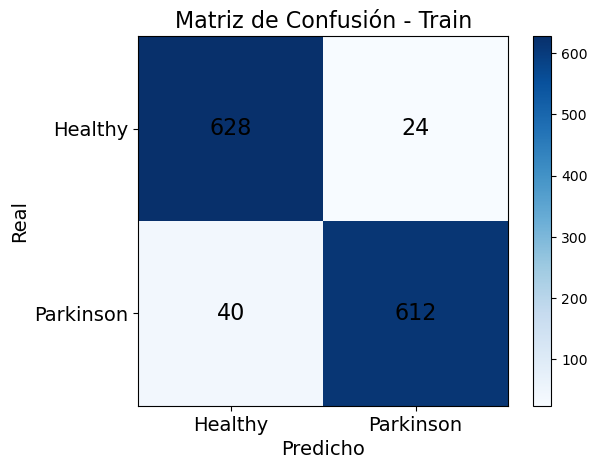

In [ ]:
y_pred_train = predecir(X_train, w_final, b_final)
cm_train = confusion_matrix(y_train, y_pred_train)

plot_confusion_matrix(cm_train , titulo="Matriz de Confusión - Train")

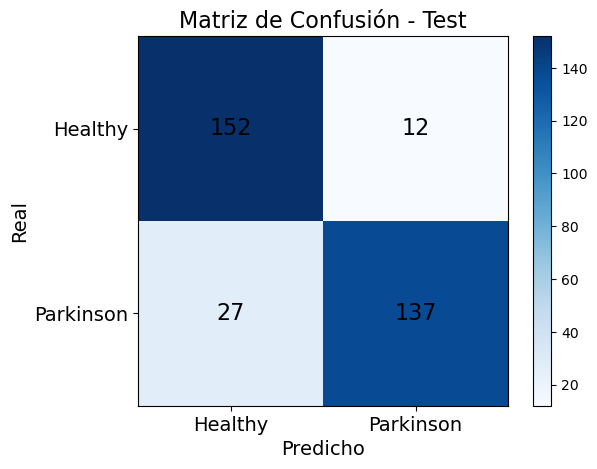

In [ ]:
y_pred_test = predecir(X_test, w_final, b_final)
cm_test = confusion_matrix(y_test, y_pred_test)

plot_confusion_matrix(cm_test, titulo="Matriz de Confusión - Test")